In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [45]:
#setup
include_transit = True
if include_transit:
    tag = 'with_transit'
else:
    tag='no_transit'
#Read in and create nested index
data_dir = 'C:\\Users\\bgerke.DOMINO0\\Desktop\\NHTS\\binned_dists\\'

In [46]:

dist_hists = pd.read_csv(data_dir+'dist_hists_by_region_'+tag+'.csv')
hourly_profiles = pd.read_csv(data_dir+'hourly_profiles_urb_rur_'+tag+'.csv')
dist_hists.set_index(['CDIVLS','URBRURS','WKTIME','MILEBIN'], inplace=True)
hourly_profiles.set_index(['URBRURS','WKTIME','MILEBIN','STRTHOUR'], inplace=True)

In [47]:
dist_hists

AVGDIST  COUNTSRAW     COUNTSWTD
CDIVLS URBRURS WKTIME   MILEBIN                                     
ENC    RUR     MO/FR    0-2        0.977429     2053.0  7.365273e+08
                        2-5        3.231085     1298.0  3.772505e+08
                        5-10       7.281436     1002.0  2.685436e+08
                        10-20     14.354197      879.0  2.740703e+08
                        20-30     24.290520      369.0  1.134880e+08
                        30-50     38.296500      294.0  7.924429e+07
                        50-100    65.612557      149.0  3.309224e+07
                        100-300  163.518387       75.0  1.288694e+07
               SA/SU    0-2        0.990881      904.0  5.914655e+08
                        2-5        3.264059      522.0  3.314264e+08
                        5-10       7.174956      363.0  2.181214e+08
                        10-20     13.877851      376.0  2.276380e+08
                        20-30     24.590622      135.0  9.867586e+07
                        30-50     39.451236      110.0  7.459379e+07
                        50-100    66.330979       96.0  4.167240e+07
                        100-300  154.722333       33.0  1.720882e+07
               TU/WE/TH 0-2        0.972198     3018.0  8.716086e+08
                        2-5        3.263572     1871.0  5.865779e+08
                        5-10       7.266915     1482.0  4.749664e+08
                        10-20     14.300158     1366.0  5.242017e+08
                        20-30     24.381568      562.0  1.770732e+08
                        30-50     38.323571      462.0  1.505918e+08
                        50-100    67.778822      180.0  4.419798e+07
                        100-300  156.786339       59.0  1.006733e+07
       URB     MO/FR    0-2        1.091301     5464.0  2.366709e+09
                        2-5        3.299593     5786.0  2.489039e+09
                        5-10       7.128054     3777.0  1.739570e+09
                        10-20     14.064110     2660.0  1.251727e+09
                        20-30     23.916630      841.0  4.605324e+08
                        30-50     37.600925      517.0  2.568254e+08
...                                     ...        ...           ...
WSC-TX RUR     TU/WE/TH 5-10       7.225261      752.0  1.262966e+08
                        10-20     14.060794      713.0  1.304878e+08
                        20-30     24.993852      284.0  4.874912e+07
                        30-50     38.525837      294.0  4.158224e+07
                        50-100    66.838243      173.0  2.906139e+07
                        100-300  177.377809       47.0  6.633365e+06
       URB     MO/FR    0-2        1.112937    11094.0  1.425143e+09
                        2-5        3.309249    11970.0  1.545101e+09
                        5-10       7.110423     7613.0  9.971863e+08
                        10-20     14.138933     6089.0  8.016910e+08
                        20-30     24.071358     2383.0  3.030889e+08
                        30-50     37.079675     1209.0  1.508032e+08
                        50-100    68.336914      418.0  4.922806e+07
                        100-300  170.215309      269.0  3.273075e+07
               SA/SU    0-2        1.100384     3874.0  1.180684e+09
                        2-5        3.305593     4304.0  1.286707e+09
                        5-10       7.117384     2691.0  8.256438e+08
                        10-20     14.155108     1856.0  5.653556e+08
                        20-30     24.023736      694.0  2.186641e+08
                        30-50     37.755050      377.0  1.106647e+08
                        50-100    70.928787      211.0  7.154093e+07
                        100-300  166.268325      163.0  5.521378e+07
               TU/WE/TH 0-2        1.116325    16044.0  2.101744e+09
                        2-5        3.297362    17538.0  2.286532e+09
                        5-10       7.128284    11989.0  1.622220e+09
                        10-20     

In [48]:
hourly_profiles

COUNTSRAW     COUNTSWTD   TRIPPCT
URBRURS WKTIME   MILEBIN STRTHOUR                                   
RUR     MO/FR    0-2     0               6.0  3.686144e+06  0.001000
                         1               8.0  9.804437e+06  0.002661
                         2               1.0  3.220029e+05  0.000087
                         3               1.0  4.899141e+06  0.001330
                         4              27.0  3.329577e+06  0.000904
                         5              88.0  3.292373e+07  0.008935
                         6             222.0  8.691726e+07  0.023587
                         7             637.0  2.670100e+08  0.072461
                         8             529.0  2.233983e+08  0.060626
                         9             702.0  2.244169e+08  0.060902
                         10            811.0  2.601519e+08  0.070600
                         11            975.0  3.135245e+08  0.085084
                         12            988.0  3.567213e+08  0.096807
                         13            803.0  2.909382e+08  0.078954
                         14            802.0  2.657854e+08  0.072129
                         15            877.0  3.365339e+08  0.091328
                         16            788.0  3.057050e+08  0.082962
                         17            606.0  2.502709e+08  0.067918
                         18            396.0  1.780279e+08  0.048313
                         19            220.0  9.051126e+07  0.024563
                         20            179.0  7.421489e+07  0.020140
                         21            106.0  5.901752e+07  0.016016
                         22             44.0  2.555890e+07  0.006936
                         23             29.0  2.121847e+07  0.005758
                 2-5     0               6.0  4.572063e+06  0.002038
                         1               4.0  1.554191e+06  0.000693
                         3               2.0  3.235058e+05  0.000144
                         4              32.0  1.362102e+07  0.006072
                         5              82.0  2.866647e+07  0.012778
                         6             207.0  9.225242e+07  0.041121
...                                      ...           ...       ...
URB     TU/WE/TH 50-100  17            168.0  6.232830e+07  0.072522
                         18            114.0  4.301895e+07  0.050055
                         19             65.0  1.411913e+07  0.016428
                         20             68.0  1.104267e+07  0.012849
                         21             36.0  5.331993e+06  0.006204
                         22             23.0  9.409047e+06  0.010948
                         23              8.0  3.762486e+06  0.004378
                 100-300 0               1.0  1.338488e+04  0.000042
                         1               1.0  1.798080e+05  0.000563
                         3               4.0  2.328788e+05  0.000729
                         4              41.0  1.519647e+07  0.047559
                         5              46.0  1.860461e+07  0.058225
                         6              87.0  1.870351e+07  0.058535
                         7             100.0  2.307079e+07  0.072203
                         8             105.0  2.110372e+07  0.066047
                         9             128.0  3.497615e+07  0.109462
                         10             94.0  1.826812e+07  0.057172
                         11            109.0  2.376506e+07  0.074376
                         12            131.0  3.064732e+07  0.095914
                         13             89.0  1.584287e+07  0.049582
                         14            120.0  1.861029e+07  0.058243
                         15             93.0  1.548741e+07  0.048470
                         16             89.0  2.468002e+07  0.077239
                         17             51.0  1.580519e+07  0.049464
                         18             44.0  1.039181e+07  0.032522
                         19      

In [49]:
hourly_profiles['TRIPPCT'].unstack('STRTHOUR').T.mul(\
                                            dist_hists.loc['ENC','COUNTSWTD']).fillna(0.).T.loc[dist_hists.loc['ENC'].index]

STRTHOUR                            0             1             2   \
URBRURS WKTIME   MILEBIN                                             
RUR     MO/FR    0-2      7.367785e+05  1.959690e+06  6.436123e+04   
                 2-5      7.688281e+05  2.613494e+05  0.000000e+00   
                 5-10     1.606381e+06  1.499808e+05  7.918244e+04   
                 10-20    1.624157e+06  6.985760e+04  8.759426e+04   
                 20-30    1.192460e+06  6.544245e+04  2.721187e+04   
                 30-50    9.469410e+04  1.743599e+05  1.419142e+04   
                 50-100   7.000138e+05  6.055842e+04  1.395615e+04   
                 100-300  7.728057e+04  0.000000e+00  0.000000e+00   
        SA/SU    0-2      1.607650e+06  5.938090e+04  4.674389e+05   
                 2-5      9.601103e+05  1.514912e+05  0.000000e+00   
                 5-10     2.128320e+05  1.842147e+05  3.508698e+03   
                 10-20    2.105430e+05  7.140075e+05  8.843885e+05   
                 20-30    0.000000e+00  4.396405e+04  0.000000e+00   
                 30-50    0.000000e+00  8.467163e+05  0.000000e+00   
                 50-100   2.123847e+04  1.613090e+05  0.000000e+00   
                 100-300  6.800506e+03  0.000000e+00  0.000000e+00   
        TU/WE/TH 0-2      1.759687e+06  5.380890e+05  2.636215e+05   
                 2-5      1.436937e+05  1.020670e+06  5.513961e+05   
                 5-10     1.028718e+06  2.368629e+04  2.441902e+05   
                 10-20    9.393212e+05  3.575835e+05  0.000000e+00   
                 20-30    4.186748e+05  8.568963e+03  4.549290e+05   
                 30-50    5.339102e+04  4.172442e+04  2.874242e+05   
                 50-100   0.000000e+00  1.077832e+05  0.000000e+00   
                 100-300  0.000000e+00  8.529179e+05  0.000000e+00   
URB     MO/FR    0-2      5.801439e+06  1.609238e+06  1.850604e+06   
                 2-5      5.556328e+06  3.486603e+06  4.949314e+05   
                 5-10     6.492802e+06  2.382516e+06  8.324790e+05   
                 10-20    3.223737e+06  1.741563e+06  4.127147e+06   
                 20-30    1.538863e+06  9.810851e+05  2.824494e+05   
                 30-50    4.234025e+05  1.957959e+06  7.214238e+05   
                 50-100   3.797732e+05  8.603945e+04  0.000000e+00   
                 100-300  3.169605e+04  0.000000e+00  0.000000e+00   
        SA/SU    0-2      1.863164e+06  4.543148e+06  3.793327e+05   
                 2-5      5.199019e+06  5.983817e+06  4.202767e+05   
                 5-10     8.310519e+06  2.589001e+06  1.577659e+06   
                 10-20    5.671584e+06  3.336846e+06  3.553174e+05   
                 20-30    1.258299e+06  1.121742e+06  1.255928e+05   
                 30-50    6.075646e+05  7.592909e+05  1.214091e+05   
                 50-100   3.510324e+05  2.604974e+05  2.044732e+05   
                 100-300  2.066027e+05  2.458704e+05  0.000000e+00   
        TU/WE/TH 0-2      3.448352e+06  1.312767e+06  4.465130e+05   
                 2-5      8.162658e+06  2.493417e+06  1.724806e+06   
                 5-10     6.801555e+06  3.076192e+06  3.153322e+06   
                 10-20    5.449215e+06  3.249885e+06  2.640698e+06   
                 20-30    2.260057e+06  1.076317e+06  7.919259e+05   
                 30-50    1.411992e+06  1.574024e+06  3.731684e+04   
                 50-100   2.790491e+05  2.648937e+05  1.198041e+05   
                 100-300  2.384017e+03  3.202608e+04  0.000000e+00   

STRTHOUR                            3             4             5   \
URBRURS WKTIME   MILEBIN                                             
RUR     MO/FR    0-2      9.792297e+05  6.655086e+05  6.580724e+06   
                 2-5      5.440002e+04  2.290481e+06  4.820491e+06   
                 5-10     1.660632e+05  1.818888e+06  3.466357e+06   
                 10-20    1.437051e+04  1.706280e+06  8.093510e+06   
                 20-30    2.255087e+05  1.583937e+06  2.617529e+06   
         

In [50]:
#Reshape and multiply together.
dist_hour_hists = dist_hists.copy()
dist_hour_hists.rename(columns={'COUNTSRAW':'NRAW', 'COUNTSWTD':'NWTD'},inplace=True)

#Create new columns for hourly trip counts
for h in range(24):
    dist_hour_hists[h]=0

for reg in dist_hists.index.levels[0]:
    dist_hour_hists.loc[reg,range(24)] = \
        hourly_profiles['TRIPPCT'].unstack('STRTHOUR').T.mul(\
                                            dist_hists.loc[reg,'COUNTSWTD']).fillna(0.).T.loc[dist_hists.loc[reg].index].values
        #The final reindexing by dist_hists.loc[reg].index is essential to get the rows in the right order!


In [51]:
#If you want to write this out to CSV, uncomment and modify the below.
#BUT make sure to see below for example usage!
dist_hour_hists.to_csv(data_dir+'dist_hour_hists_'+tag+'.csv')
dist_hour_hists

AVGDIST     NRAW          NWTD  \
CDIVLS URBRURS WKTIME   MILEBIN                                      
ENC    RUR     MO/FR    0-2        0.977429   2053.0  7.365273e+08   
                        2-5        3.231085   1298.0  3.772505e+08   
                        5-10       7.281436   1002.0  2.685436e+08   
                        10-20     14.354197    879.0  2.740703e+08   
                        20-30     24.290520    369.0  1.134880e+08   
                        30-50     38.296500    294.0  7.924429e+07   
                        50-100    65.612557    149.0  3.309224e+07   
                        100-300  163.518387     75.0  1.288694e+07   
               SA/SU    0-2        0.990881    904.0  5.914655e+08   
                        2-5        3.264059    522.0  3.314264e+08   
                        5-10       7.174956    363.0  2.181214e+08   
                        10-20     13.877851    376.0  2.276380e+08   
                        20-30     24.590622    135.0  9.867586e+07   
                        30-50     39.451236    110.0  7.459379e+07   
                        50-100    66.330979     96.0  4.167240e+07   
                        100-300  154.722333     33.0  1.720882e+07   
               TU/WE/TH 0-2        0.972198   3018.0  8.716086e+08   
                        2-5        3.263572   1871.0  5.865779e+08   
                        5-10       7.266915   1482.0  4.749664e+08   
                        10-20     14.300158   1366.0  5.242017e+08   
                        20-30     24.381568    562.0  1.770732e+08   
                        30-50     38.323571    462.0  1.505918e+08   
                        50-100    67.778822    180.0  4.419798e+07   
                        100-300  156.786339     59.0  1.006733e+07   
       URB     MO/FR    0-2        1.091301   5464.0  2.366709e+09   
                        2-5        3.299593   5786.0  2.489039e+09   
                        5-10       7.128054   3777.0  1.739570e+09   
                        10-20     14.064110   2660.0  1.251727e+09   
                        20-30     23.916630    841.0  4.605324e+08   
                        30-50     37.600925    517.0  2.568254e+08   
...                                     ...      ...           ...   
WSC-TX RUR     TU/WE/TH 5-10       7.225261    752.0  1.262966e+08   
                        10-20     14.060794    713.0  1.304878e+08   
                        20-30     24.993852    284.0  4.874912e+07   
                        30-50     38.525837    294.0  4.158224e+07   
                        50-100    66.838243    173.0  2.906139e+07   
                        100-300  177.377809     47.0  6.633365e+06   
       URB     MO/FR    0-2        1.112937  11094.0  1.425143e+09   
                        2-5        3.309249  11970.0  1.545101e+09   
                        5-10       7.110423   7613.0  9.971863e+08   
                        10-20     14.138933   6089.0  8.016910e+08   
                        20-30     24.071358   2383.0  3.030889e+08   
                        30-50     37.079675   1209.0  1.508032e+08   
                        50-100    68.336914    418.0  4.922806e+07   
                        100-300  170.215309    269.0  3.273075e+07   
               SA/SU    0-2        1.100384   3874.0  1.180684e+09   
                        2-5        3.305593   4304.0  1.286707e+09   
                        5-10       7.117384   2691.0  8.256438e+08   
                        10-20     14.155108   1856.0  5.653556e+08   
                        20-30     24.023736    694.0  2.186641e+08   
                        30-50     37.755050    377.0  1.106647e+08   
                        50-100    70.928787    211.0  7.154093e+07   
                        100-300  166.268325    163.0  5.521378e+07   
               TU/WE/TH 0-2        1.116325  16044.0  2.101744e+09   
                        2-5        3.297362  17538.0  2.286532e+09   
                        5-10       7.128284  1

In [52]:
#Check average miles (should be ~9)
dist_hour_hists[range(24)].mul(dist_hour_hists['AVGDIST'], axis=0).sum(axis=1).sum()/dist_hour_hists[range(24)].sum(axis=1).sum()

8.90740497182665

In [53]:
#list the regions
dist_hour_hists.index.levels[0].unique()


Index([u'ENC', u'ESC', u'MAT-NL', u'MAT-NY', u'MTN', u'NENG', u'PAC-CA',
       u'PAC-NL', u'SAT-FL', u'SAT-NL', u'WNC', u'WSC-NL', u'WSC-TX'],
      dtype='object', name=u'CDIVLS')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011484630>,
      dtype=object)

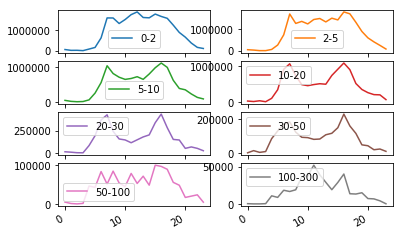

In [56]:
#Plot an example region

#First, must downsample to an average day from the NHTS annualized trip weights:
weektime = 'MO/FR'
#weektime = 'TU/WE/TH'
#weektime = 'SA/SU'

ndays = weektime.count('/')+1.
ann2daily = 7/ndays/365.
#if weektime == 'WEEKDAY':
#    ann2daily = 7/5/365. #Number of weekdays in year
#elif weektime == 'WEEKEND':
#    ann2daily = 7/2/365. #Number of weekend days in the year 
#else:
#    raise ValueError('weektime must be either "WEEKDAY" or "WEEKEND"')
    
dist_hour_hists.loc[('PAC-CA','URB',weektime), range(24)].mul(ann2daily).T.plot(subplots=True,layout=[4,2])